In [3]:
from torchvision import datasets
data_path = './cifar'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# this showcases the fact that cifar10 is a descendant of Dataset
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [8]:
# cifar10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

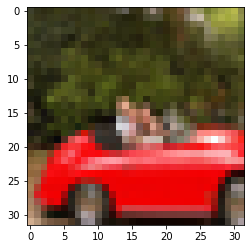

In [11]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [14]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [17]:
tensor_cifar10 = \
    datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=to_tensor)

In [22]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [24]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [26]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

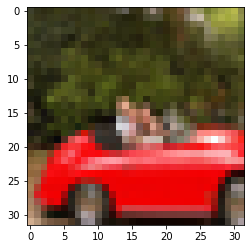

In [31]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [34]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [36]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [42]:
imgs.view(3, -1).std(dim=1).tolist()

[0.24703224003314972, 0.24348513782024384, 0.26158785820007324]

In [46]:
normalize_transform = transforms.Normalize(imgs.view(3, -1).mean(dim=1).tolist(), imgs.view(3, -1).std(dim=1).tolist())

In [47]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        normalize_transform])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


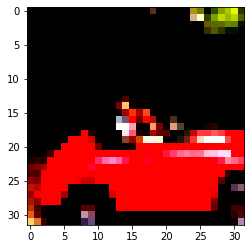

In [50]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [51]:
label_map = {0: 0, 2: 1}
class_name = ['airplane', 'bird']
cifar_2 = [(img, label_map[label])
        for img, label in cifar10
        if label in [0, 2]]
cifar2_val = [(img, label_map[label])
        for img, label in cifar10_val
        if label in [0, 2]]